In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Evaluation Project Phase - Week 2 - (07-02)\census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [59]:
df.isnull().sum().sum()

0

In [60]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Workclass']=LE.fit_transform(df['Workclass'])
df['Workclass'].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

In [61]:
LE.inverse_transform([0,1,2,3,4,5,6,7,8]) # Represent the class names assign to which values and easier to know if forgot

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])
df['Education'].value_counts()

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

In [63]:
LE.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) # Represent the class names assign to which values and easier to know if forgot

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [64]:
df['Occupation']=LE.fit_transform(df['Occupation'])
df['Occupation'].value_counts()

10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

In [65]:
LE.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]) # Represent the class names assign to which values and easier to know if forgot

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [66]:
df['Income']=LE.fit_transform(df['Income'])
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [67]:
LE.inverse_transform([0, 1])

array([' <=50K', ' >50K'], dtype=object)

In [68]:
df.drop({'Education_num','Marital_status','Relationship','Race','Sex','Native_country'},axis=1,inplace=True)
df.head()

,Age,Workclass,Fnlwgt,Education,Occupation,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,83311,9,4,0,0,13,0
1,38,4,215646,11,6,0,0,40,0
2,53,4,234721,1,6,0,0,40,0
3,28,4,338409,9,10,0,0,40,0
4,37,4,284582,12,4,0,0,40,0


In [69]:
df['Workclass'].fillna(int(df['Workclass'].mean()), inplace=True)
df['Occupation'].fillna(int(df['Occupation'].mean()), inplace=True)

In [70]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Occupation,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,6.572912,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,4.228809,7385.402999,402.966116,12.347618,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,3.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,7.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,10.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,14.000000,99999.000000,4356.000000,99.000000,1.000000


In [71]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Occupation,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.003786,-0.076646,-0.010508,-0.020946,0.077674,0.057775,0.068756,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.255004,0.033828,0.012231,0.138974,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,0.001554,0.000437,-0.010259,-0.018770,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,-0.021274,0.030047,0.016744,0.055510,0.079311
Occupation,-0.020946,0.255004,0.001554,-0.021274,1.000000,0.025511,0.017979,0.080384,0.075448
Capital_gain,0.077674,0.033828,0.000437,0.030047,0.025511,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,0.012231,-0.010259,0.016744,0.017979,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,0.138974,-0.018770,0.055510,0.080384,0.078409,0.054256,1.000000,0.229690
Income,0.234039,0.051645,-0.009481,0.079311,0.075448,0.223333,0.150523,0.229690,1.000000


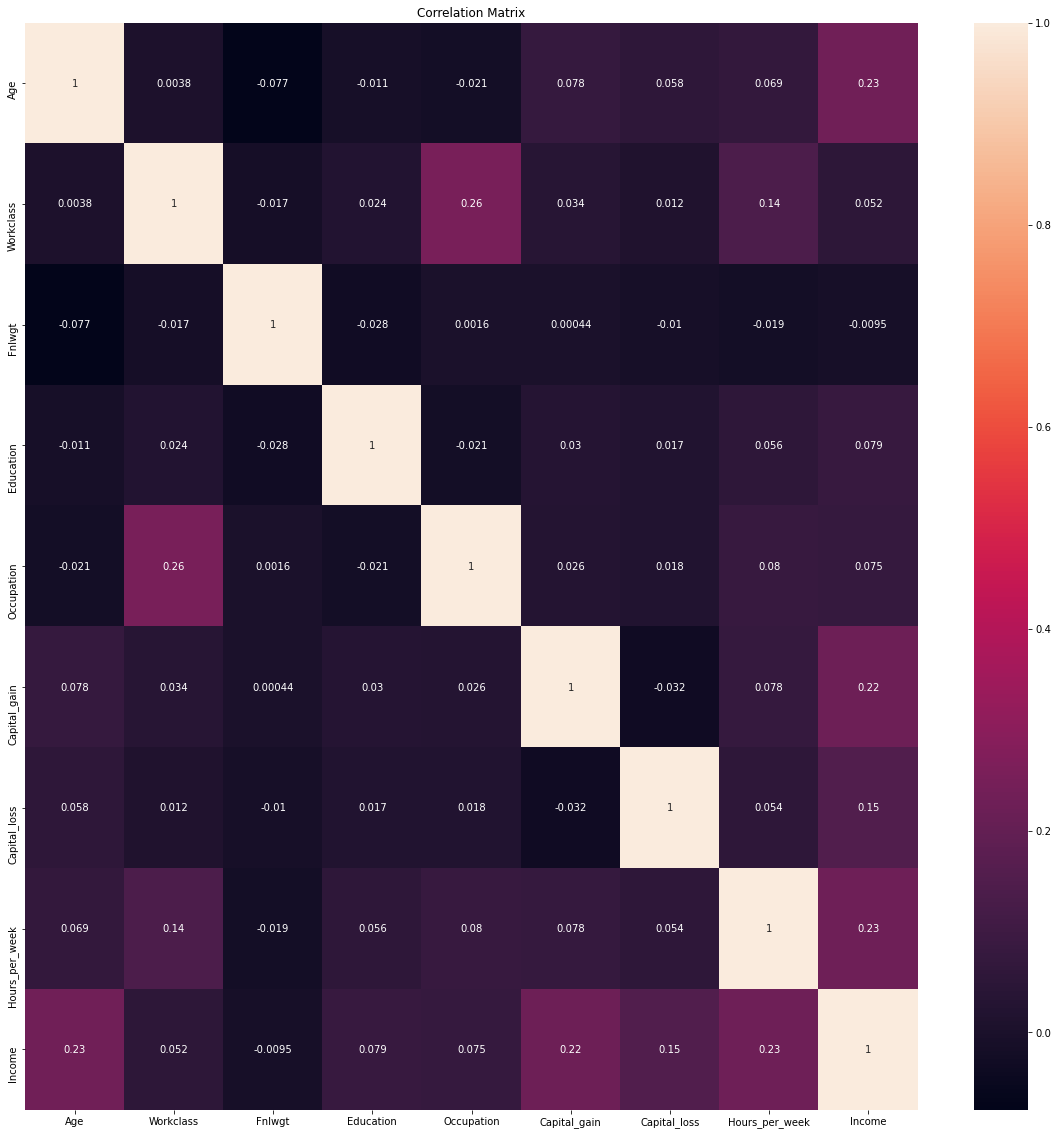

In [72]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[20,20])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

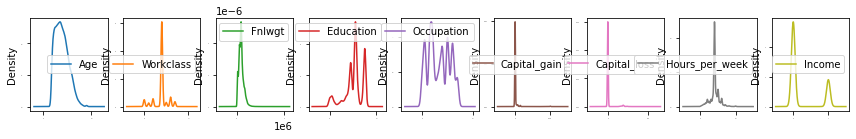

In [73]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,fontsize=1,figsize=(18,12))
plt.show()

In [74]:
x=df.drop('Income',axis=1)
y=df['Income']

In [75]:
x.skew().sort_values(ascending=False) # For descending

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Age                0.558738
Hours_per_week     0.227636
Occupation         0.114540
Workclass         -0.752280
Education         -0.934063
dtype: float64

In [76]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [77]:
x.skew().sort_values(ascending=False)

Capital_loss      4.299511
Capital_gain      3.016951
Hours_per_week    0.229556
Workclass         0.061629
Fnlwgt            0.016914
Age              -0.013897
Occupation       -0.187152
Education        -0.309431
dtype: float64

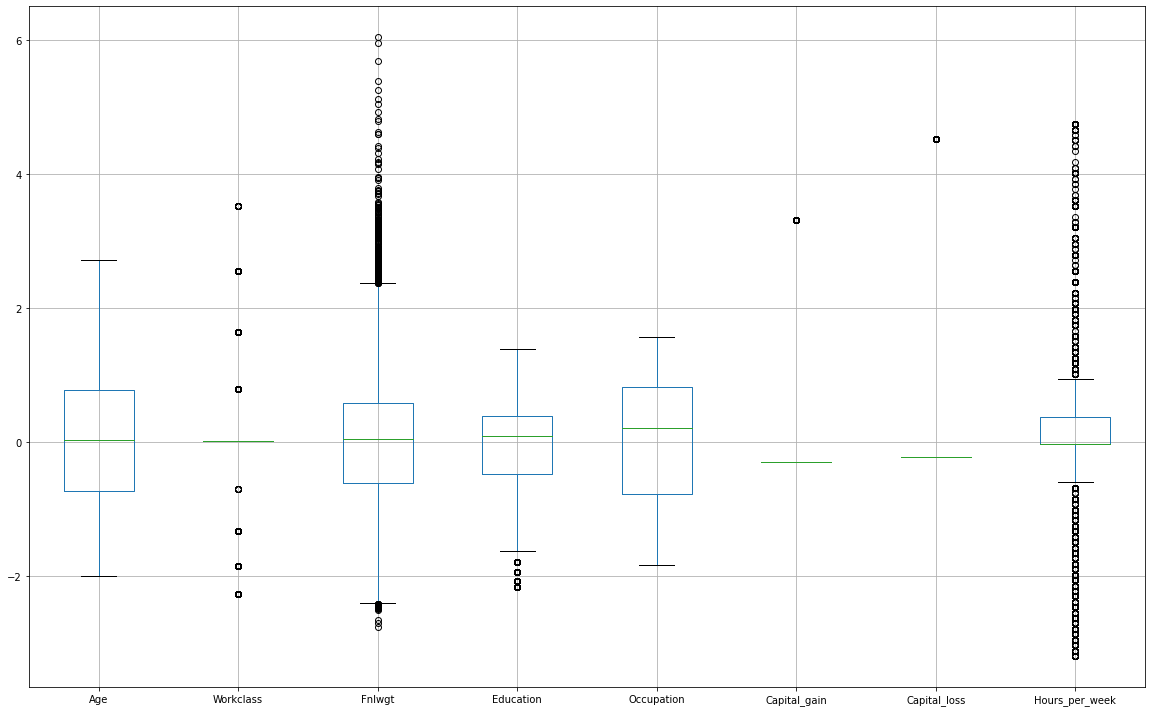

In [78]:
x.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [79]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(32560, 8)

In [80]:
threshold=2.5
print(np.where(z>2.5))

(array([    7,     8,     9, ..., 32547, 32548, 32559], dtype=int64), array([5, 5, 7, ..., 5, 1, 5], dtype=int64))


In [81]:
x_new=x[(z<2.5).all(axis=1)]
print(x.shape)
print(x_new.shape)

(32560, 8)
(26115, 8)


In [82]:
loss_percent=(32560-26115)/32560*100
print(loss_percent)

19.794226044226043


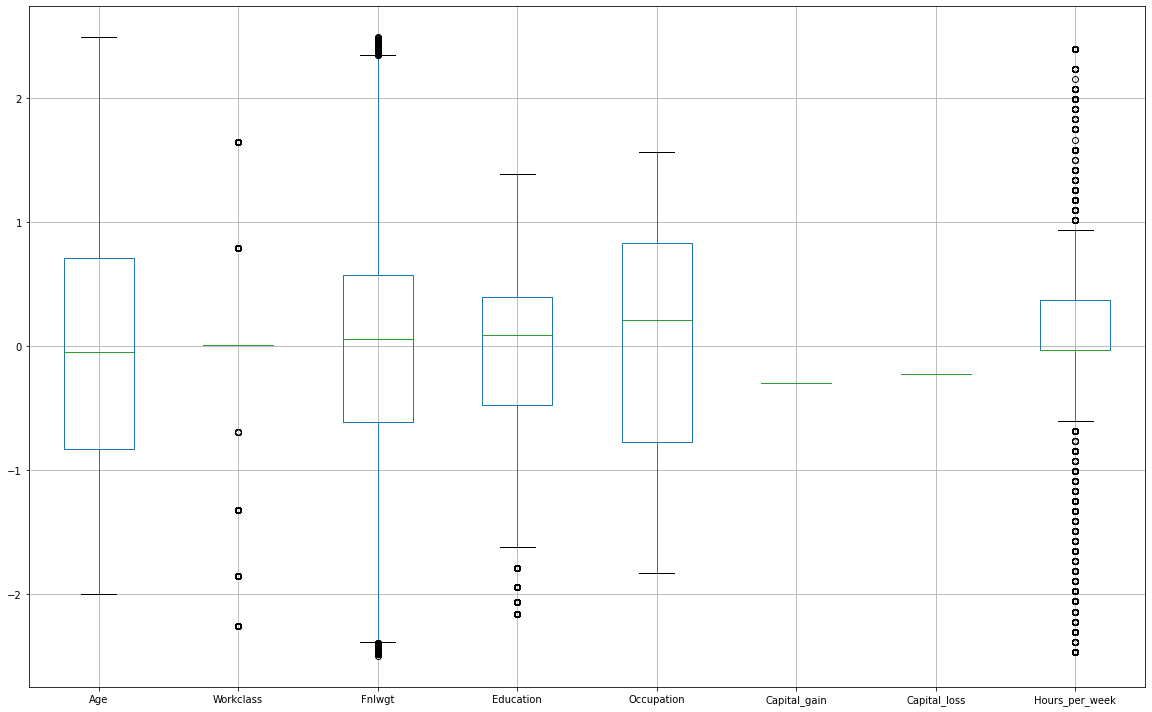

In [83]:
x_new.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [85]:
y_new=y[(z<2.5).all(axis=1)]
print(y.shape)
print(y_new.shape)

(32560,)
(26115,)


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0 # max accuracy
maxRS=0 # best random state value for which max accuracy is achieved
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train) # Fitting the data will train the model
    predrf=LR.predict(x_test) # Predicting the data # Predicted traget variable
    acc=accuracy_score(y_test,predrf) # two target varaible # accuracy score
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Randon_state ",maxRS)

Best accuracy is  0.8196438828259621 on Randon_state  143


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=143)

In [89]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 81.96438828259622
[[4209   81]
 [ 861   72]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      4290
           1       0.47      0.08      0.13       933

    accuracy                           0.82      5223
   macro avg       0.65      0.53      0.52      5223
weighted avg       0.77      0.82      0.76      5223



In [90]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 76.46946199502202
[[3610  680]
 [ 549  384]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4290
           1       0.36      0.41      0.38       933

    accuracy                           0.76      5223
   macro avg       0.61      0.63      0.62      5223
weighted avg       0.78      0.76      0.77      5223



In [91]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 82.27072563660731
[[3977  313]
 [ 613  320]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4290
           1       0.51      0.34      0.41       933

    accuracy                           0.82      5223
   macro avg       0.69      0.64      0.65      5223
weighted avg       0.80      0.82      0.81      5223



In [92]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 82.17499521347884
[[4290    0]
 [ 931    2]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4290
           1       1.00      0.00      0.00       933

    accuracy                           0.82      5223
   macro avg       0.91      0.50      0.45      5223
weighted avg       0.85      0.82      0.74      5223



In [93]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_new,y_new,cv=5)
print("Cross Validation Score Of Logistic Regression Model :",scr.mean())
scr1=cross_val_score(dt,x_new,y_new,cv=5)
print("Cross Validation Score Of Decision Tree Model :",scr.mean())
scr2=cross_val_score(rf,x_new,y_new,cv=5)
print("Cross Validation Score Of Random Forest Model :",scr2.mean())
scr3=cross_val_score(svc,x_new,y_new,cv=5)
print("Cross Validation Score Of SVC Model :",scr3.mean())

Cross Validation Score Of Logistic Regression Model : 0.8057438253877083
Cross Validation Score Of Decision Tree Model : 0.8057438253877083
Cross Validation Score Of Random Forest Model : 0.8183036569021634
Cross Validation Score Of SVC Model : 0.8106835152211372


In [94]:
from sklearn.model_selection import GridSearchCV
# Create parameters list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridSearchCV
GCV_pred=GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test,GCV_pred) # checking final accuracy

0.8370668198353437

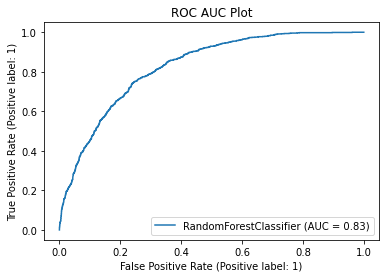

In [95]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [96]:
a=np.array(y_test)
predicted=np.array(LR.predict(x_test))
Income=pd.DataFrame({'Original_Data':a,'Predicted_Data':predicted},index=range(len(a)))
Income

,Original_Data,Predicted_Data
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5218,0,0
5219,0,0
5220,1,0
5221,0,0


In [97]:
# Model Saving
import pickle
filename = 'Census_Income_Project.pkl'
pickle.dump(LR,open(filename,'wb'))

# Thanks...!!!